In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import pickle

with open("./results/params_search_ddpg.pickle", 'rb') as f:
    result = pickle.load(f)
    
reward = result['reward']
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']

import numpy as np
tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)
reward = np.array(reward)

indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1)) == 1)
print("indices : ", indices)

indices :  (array([   258,    260,    415,    451,    515,    516,    517,    759,
          844,    850,    879,    949,    980,   1007,   1381,   1382,
         1573,   1574,   1735,   1751,   2173,   2174,   2443,  15075,
        35012,  99839, 158846, 174558, 331764, 362735, 658399, 679646,
       727973]),)


In [22]:
reward[indices]

array([2.9616714 , 2.95608528, 2.91421841, 2.9589042 , 2.85483435,
       2.90578797, 2.86112353, 2.97771199, 2.94137497, 2.9602533 ,
       2.94654191, 2.93918101, 2.89060363, 2.96697642, 2.88780543,
       2.832996  , 2.93679859, 2.93639481, 2.98296078, 2.95686687,
       2.94539168, 2.93999406, 2.96770422, 2.9584179 , 2.93015273,
       2.91336643, 2.90280037, 2.94151814, 2.91451925, 2.93495316,
       2.9422623 , 2.9390172 , 2.94898757])

In [23]:
tau[indices]

array([0.78815637, 0.80457528, 0.77099083, 0.78237779, 0.78865693,
       0.79136138, 0.79942813, 0.75537172, 0.77920791, 0.78096626,
       0.76077114, 0.78989076, 0.78252767, 0.77077191, 0.79978027,
       0.80062016, 0.75672017, 0.76554194, 0.7479847 , 0.77770308,
       0.78539416, 0.79608219, 0.78102153, 0.76945676, 0.77815641,
       0.77506474, 0.77941275, 0.78548481, 0.78533123, 0.7916646 ,
       0.77962587, 0.77905258, 0.77803672])

In [24]:
n_tau = np.array([comp['n_tau'] for comp in result['state']])
n_tau_lower = np.array([comp['n_tau_lower'] for comp in result['state']])
idx = np.argmax(n_tau / n_tau_lower)

print("n_tau : {:.3f}, n_tau_lawson : {:.3f}".format(n_tau[idx], n_tau_lower[idx]))

n_tau : 1.536, n_tau_lawson : 3.768


In [25]:
result['state'][idx]

{'R': 4.732756001640621,
 'a': 0.9892292199906225,
 'blanket_thickness': 0.8961271619398331,
 'coil_thickness': 0.9052591808769666,
 'n': 1.9849923094429323,
 'TBR': 1.4479528583756984,
 'beta': 3.7412867257363467,
 'tau': 0.77383605385984,
 'Ip': 5.909878740828339,
 'q': 5.801975166129605,
 'f_BS': 0.3795489605897273,
 'Q_parallel': 621.6395115145606,
 'n_g': 1.9223604601182565,
 'q_kink': 2,
 'beta_troyon': 2.4202158372139624,
 'f_NC': 2.5792876959728903,
 'n_tau': 1.5360586156814489,
 'n_tau_lower': 3.768338471017189}

In [26]:
result['control'][idx]

{'betan': 2.967187,
 'k': 2.8384042,
 'epsilon': 4.7842865,
 'electric_power': 999737060.546875,
 'T_avg': 10.476976,
 'B0': 12.61725,
 'H': 1.5464562}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


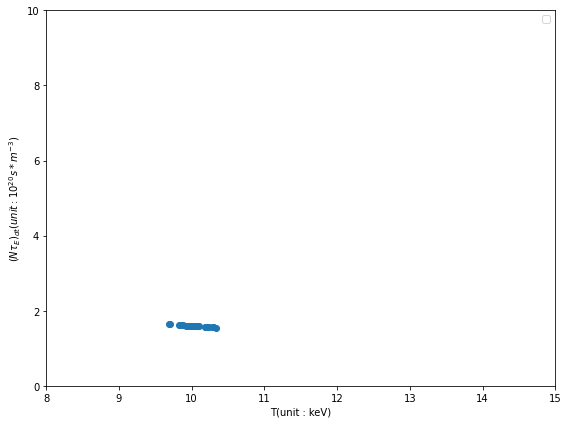

In [34]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

T = [result['control'][idx]['T_avg'] for idx in indices[0]]
n_tau = [result['state'][idx]['n_tau'] for idx in indices[0]]

fig, axes = plt.subplots(1,2,figsize = (8,6))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.set_xlim([8,15])
ax.set_ylim([0,10])
ax.legend()

ax = axes[1]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.set_xlim([8,15])
ax.set_ylim([0,10])
ax.legend()

fig.tight_layout()

In [3]:
import pickle

with open("./results/params_search_sac.pickle", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']

import numpy as np
tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1)) == 1)
print("indices : ", indices)

indices :  (array([], dtype=int64),)


In [1]:
import pickle

with open("./results/params_search_ppo.pickle", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']

import numpy as np
tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1)) == 1)
print("indices : ", indices)

indices :  (array([   42,    56,    57, ..., 99980, 99985, 99987]),)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


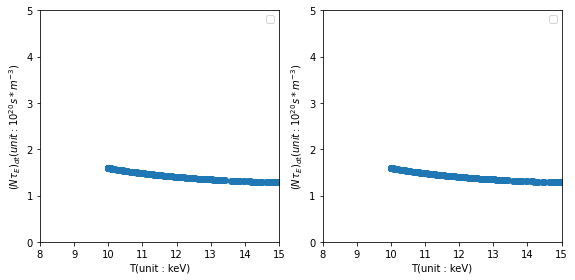

In [2]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

T = [result['control'][idx]['T_avg'] for idx in indices[0]]
n_tau = [result['state'][idx]['n_tau'] for idx in indices[0]]

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.set_xlim([8,15])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.set_xlim([8,15])
ax.set_ylim([0,5])
ax.legend()

fig.tight_layout()